<a href="https://colab.research.google.com/github/aryamanbhati/ML_Projects/blob/main/notebookc886399716.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'house-plant-species:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5660724%2F9427761%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240928%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240928T173904Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D9e4d746080003132e62f80f8a9544252139a04a7f3c067ff38783350ee101dae5ec6aac3776ee82f9ae1d7f71f27299eab73db6d00bdb0d0b881b604b01f2d828039dc7833e2018326e48bdd026bd09f4715250e9ed113b3c93060418d1df066f8b2b628d6b274acca3a2ea3463fa82cedf8468c5e29a381c7b35bc161abc071a5ea9edb7dc287a2756b20d32e6b0a0e151eb072e70bd14f1ca974fde4608e234eefbaa5e59bd135211a20c0fa50785b87c18cadafaedb521162fc347bc54df5809f37223ee16a3c885ceb98a809544c9efb230940bcba138864d59b4ea39a8457a214548ee4fdb795ce40db9b608eb444958249117f47738778db531920b2e8'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 5205034688 bytes downloaded
Downloaded and uncompressed: house-plant-species
Data source import complete.


In [ ]:


import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data_set="/kaggle/input/house-plant-species/house_plant_species"

In [20]:
species = os.listdir("/kaggle/input/house-plant-species/house_plant_species")
species

['Rattlesnake Plant (Calathea lancifolia)',
 'Chinese Money Plant (Pilea peperomioides)',
 'Begonia (Begonia spp.)',
 'English Ivy (Hedera helix)',
 'Ponytail Palm (Beaucarnea recurvata)',
 'Sago Palm (Cycas revoluta)',
 'Calathea',
 'Prayer Plant (Maranta leuconeura)',
 'Chinese evergreen (Aglaonema)',
 'ZZ Plant (Zamioculcas zamiifolia)',
 'Areca Palm (Dypsis lutescens)',
 'Anthurium (Anthurium andraeanum)',
 'Bird of Paradise (Strelitzia reginae)',
 'Birds Nest Fern (Asplenium nidus)',
 'Asparagus Fern (Asparagus setaceus)',
 'Poinsettia (Euphorbia pulcherrima)',
 'Parlor Palm (Chamaedorea elegans)',
 'Orchid',
 'Dracaena',
 'Chrysanthemum',
 'Christmas Cactus (Schlumbergera bridgesii)',
 'Peace lily',
 'Hyacinth (Hyacinthus orientalis)',
 'Lilium (Hemerocallis)',
 'Tradescantia',
 'Boston Fern (Nephrolepis exaltata)',
 'Tulip',
 'Dumb Cane (Dieffenbachia spp.)',
 'Aloe Vera',
 'Kalanchoe',
 'Polka Dot Plant (Hypoestes phyllostachya)',
 'Venus Flytrap',
 'Snake plant (Sanseviera)',


In [21]:
species_images = {}
for specie in species:
    species_images[specie] = os.listdir(f"/kaggle/input/house-plant-species/house_plant_species/{specie}")
for specie in species_images:
    print(f"Dataset contains {len(species_images[specie])} images of {specie}")

Dataset contains 316 images of Rattlesnake Plant (Calathea lancifolia)
Dataset contains 382 images of Chinese Money Plant (Pilea peperomioides)
Dataset contains 236 images of Begonia (Begonia spp.)
Dataset contains 240 images of English Ivy (Hedera helix)
Dataset contains 197 images of Ponytail Palm (Beaucarnea recurvata)
Dataset contains 202 images of Sago Palm (Cycas revoluta)
Dataset contains 330 images of Calathea
Dataset contains 400 images of Prayer Plant (Maranta leuconeura)
Dataset contains 514 images of Chinese evergreen (Aglaonema)
Dataset contains 438 images of ZZ Plant (Zamioculcas zamiifolia)
Dataset contains 189 images of Areca Palm (Dypsis lutescens)
Dataset contains 455 images of Anthurium (Anthurium andraeanum)
Dataset contains 180 images of Bird of Paradise (Strelitzia reginae)
Dataset contains 290 images of Birds Nest Fern (Asplenium nidus)
Dataset contains 169 images of Asparagus Fern (Asparagus setaceus)
Dataset contains 306 images of Poinsettia (Euphorbia pulcherr

In [22]:
df = pd.DataFrame({"species": [k for k,li in species_images.items() for image in li], "image": [image for k,li in species_images.items() for image in li]})
df

,species,image
0,Rattlesnake Plant (Calathea lancifolia),52.jpg
1,Rattlesnake Plant (Calathea lancifolia),177.jpg
2,Rattlesnake Plant (Calathea lancifolia),208.jpg
3,Rattlesnake Plant (Calathea lancifolia),60.jpg
4,Rattlesnake Plant (Calathea lancifolia),45.jpg
...,...,...
14785,Lily of the valley (Convallaria majalis),90.jpg
14786,Lily of the valley (Convallaria majalis),374.jpg
14787,Lily of the valley (Convallaria majalis),188.jpg
14788,Lily of the valley (Convallaria majalis),70.jpg


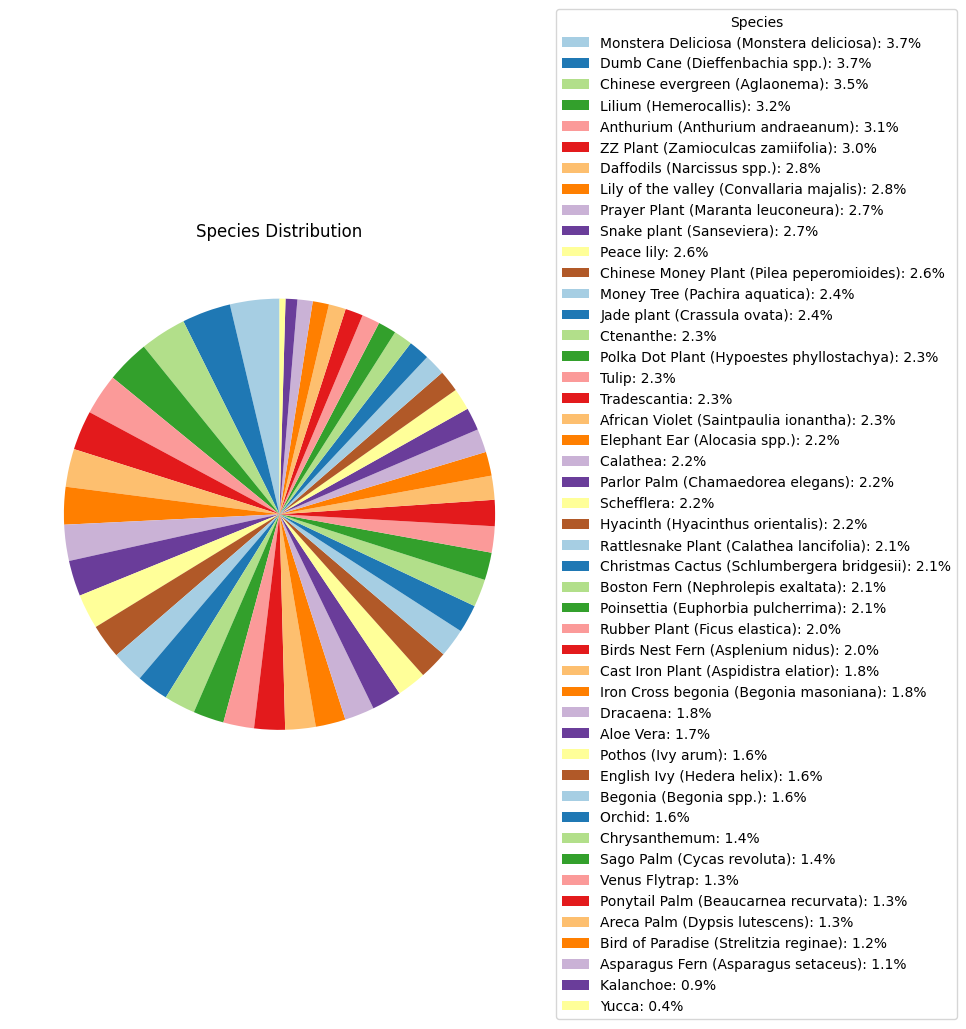

In [23]:
value_counts = df['species'].value_counts()

# Calculate the percentage for each category
percentages = 100 * value_counts / value_counts.sum()

# Plot pie chart without labels on the pie
plt.figure(figsize=(7, 7))
plt.pie(value_counts, startangle=90, colors=plt.cm.Paired.colors)

# Add title
plt.title('Species Distribution')

# Create a separate table of labels with percentages
labels = [f'{species}: {percentage:.1f}%' for species, percentage in zip(value_counts.index, percentages)]

# Add the labels as a legend
plt.legend(labels, title="Species", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the plot
plt.show()


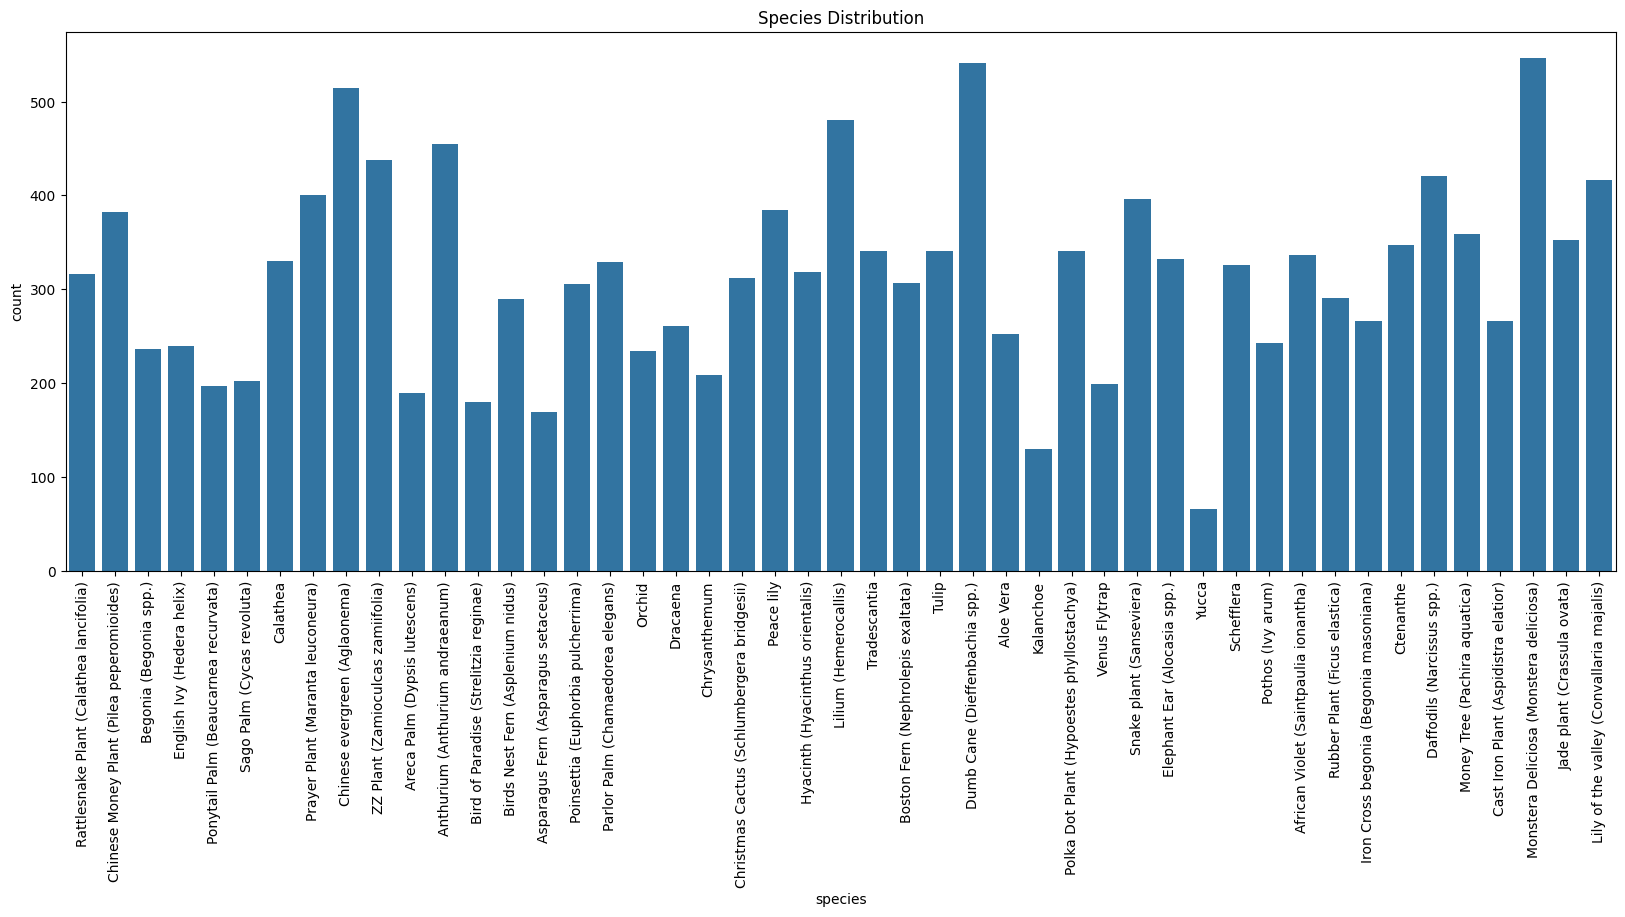

In [26]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.countplot(df, x='species')
plt.xticks(rotation=90)
plt.title("Species Distribution")
plt.show()

In [9]:

import tensorflow as tf

import sklearn
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [14]:
datagen=ImageDataGenerator(
     rescale=1./255,
    validation_split=0.2

)


train_generator =datagen.flow_from_directory(
    directory="/kaggle/input/house-plant-species/house_plant_species",
    subset='training',
    batch_size=64,
    class_mode='categorical',
    shuffle=True,
    target_size=(100, 100))

validation_generator = datagen.flow_from_directory(
    directory="/kaggle/input/house-plant-species/house_plant_species",
    subset='validation',                                                                   # we use flow_from_directory when our data is like
                                                                             #data----folder1---folder2.....
    batch_size=64,
    class_mode='categorical',
    target_size=(100, 100))

Found 11715 images belonging to 47 classes.
Found 2905 images belonging to 47 classes.


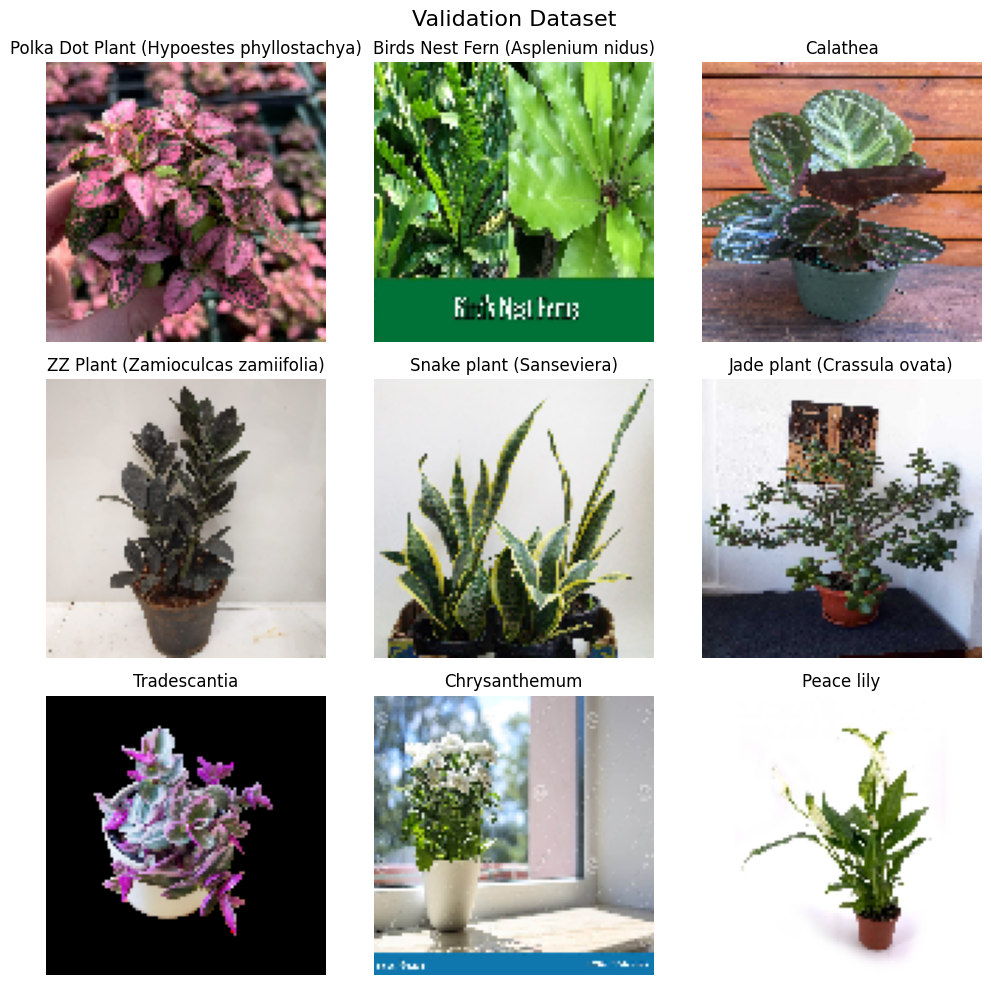

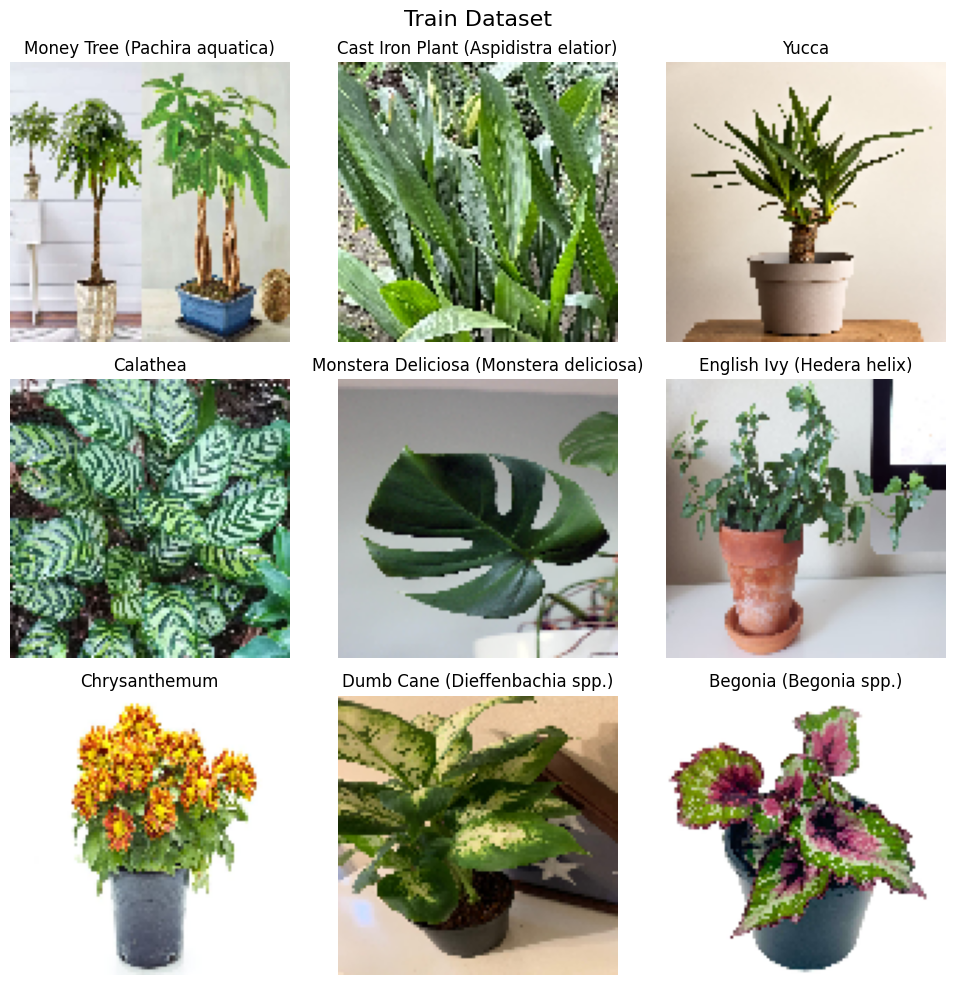

In [28]:
def visualize_augmented_images(generator, suptitle):
    # Get a batch of images from the generator
    images, labels = next(generator)
    label_map = list(generator.class_indices.keys())

    # Create a 3x3 grid to display images
    plt.figure(figsize=(10, 10))
    plt.suptitle(suptitle, fontsize=16)
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.title(label_map[np.argmax(labels[i])])
        plt.imshow(images[i])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_augmented_images(validation_generator, "Validation Dataset")
visualize_augmented_images(train_generator, "Train Dataset")

In [15]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(100,100,3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers for your specific classification task
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(47,activation='softmax')(x)  # num_classes is the number of categories

# Create the full model
model = Model(inputs=base_model.input, outputs=x)



In [ ]:
model.summary()

Epoch 1/10
184/184 [==============================] - 328s 2s/step - loss: 2.6021 - accuracy: 0.3275 - val_loss: 2.1761 - val_accuracy: 0.4293
Epoch 2/10
184/184 [==============================] - 320s 2s/step - loss: 1.3670 - accuracy: 0.6121 - val_loss: 1.8580 - val_accuracy: 0.4950
Epoch 3/10
184/184 [==============================] - 307s 2s/step - loss: 0.7928 - accuracy: 0.7848 - val_loss: 1.7776 - val_accuracy: 0.5260
Epoch 4/10
184/184 [==============================] - 304s 2s/step - loss: 0.4333 - accuracy: 0.9000 - val_loss: 1.9534 - val_accuracy: 0.5060
Epoch 5/10
184/184 [==============================] - 300s 2s/step - loss: 0.2682 - accuracy: 0.9493 - val_loss: 1.7617 - val_accuracy: 0.5494
Epoch 6/10
184/184 [==============================] - 319s 2s/step - loss: 0.1302 - accuracy: 0.9890 - val_loss: 1.7163 - val_accuracy: 0.5608
Epoch 7/10
184/184 [==============================] - 316s 2s/step - loss: 0.0646 - accuracy: 0.9986 - val_loss: 1.7100 - val_accuracy: 0.5731

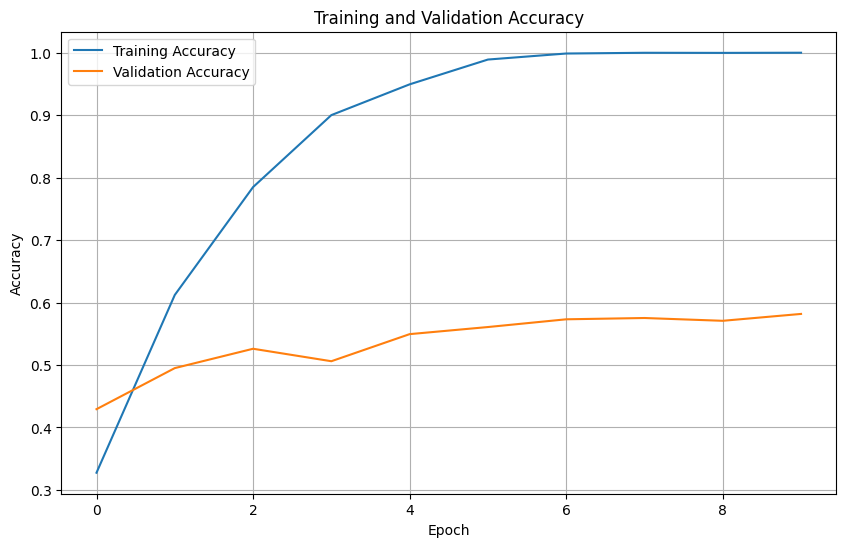

In [17]:
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Metric to monitor
    patience=3,              # Number of epochs to wait for improvement
    restore_best_weights=True )# Restore model weights from the epoch with the best value of the monitored metric



model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    verbose=1,
    callbacks=[early_stopping]

)



import matplotlib.pyplot as plt

# Extract accuracy and validation accuracy from history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

46/46 [==============================] - 61s 1s/step - loss: 1.7326 - accuracy: 0.5818
Test Loss: 1.7326263189315796
Test Accuracy: 0.5817555785179138
